In [1]:
import random,math,copy,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from tqdm import tqdm
import time
from sklearn.model_selection import GridSearchCV


C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/707/original/Good_Job!.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
m=20  # Problem dimension (number of decision variables
Ap=0.1  # Awareness probability
fl=2   # Flight length (fl)
wf=1.2# wf is used to control the importance of classification accuracy and number of selected features.
d=67600# Flock (population) size
lt=67600

In [3]:
df=pd.read_csv("MCI-CN.csv")
df = df.dropna(how='all')
df.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
df=df.drop(columns=['Unnamed: 0'])


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 0 to 1721
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 888.1 MB


In [4]:
val_Data = pd.read_csv("MCI-CN_val.csv")
val_Data = val_Data.dropna(how='all')
#val_Data=val_Data.drop(columns=['Unnamed: 0'])

val_Data.head()

,label,0,1,2,3,4,5,6,7,8,...,67590,67591,67592,67593,67594,67595,67596,67597,67598,67599
0,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
3,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255
4,2,255,255,255,255,255,255,254,253,254,...,255,255,255,255,255,255,255,255,255,255


In [14]:
val_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Columns: 67601 entries, label to 67599
dtypes: int64(67601)
memory usage: 273.9 MB


In [5]:
features = [i for i in range(0,67600)]

In [6]:

y_train=df['label']
x_train=df[df.columns[1:]]
x_train.columns=features

In [7]:
y_test = val_Data['label']
x_test = val_Data[val_Data.columns[1:]]
x_test.columns=features

## WITHOUT GRID-SEARCH AND WITHOUT BIO-INSPIRED

In [18]:
print(time.time())

neigh1 = KNeighborsClassifier()
neigh1.fit(x_train, y_train)
neigh1.predict(x_test)
nacc1=neigh1.score(x_test,y_test)

print(nacc1)

#
rforest1 = RandomForestClassifier()
rforest1.fit(x_train, y_train)
rforest1.predict(x_test)
rfacc1=rforest1.score(x_test,y_test)

print(rfacc1)

#
dtree1 = tree.DecisionTreeClassifier()
dtree1.fit(x_train, y_train)
dtree1.predict(x_test)
dtacc1=dtree1.score(x_test,y_test)

print(dtacc1)

clf1 = svm.SVC()
clf1.fit(x_train, y_train)
clf1.predict(x_test)
clfacc1=clf1.score(x_test,y_test)

print(clfacc1)


1553592908.84151
0.6308851224105462
0.664783427495292
0.7080979284369114
0.6836158192090396


In [20]:
im=(rforest1.feature_importances_)
print(im)

[0. 0. 0. ... 0. 0. 0.]


In [21]:
imo=pd.Series()
for i in tqdm(range(d)):
    imo= imo.set_value(features[i],im[i])

  0%|                                                                                        | 0/67600 [00:00<?, ?it/s]C:\Users\SONAL BANSAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
100%|███████████████████████████████████████████████████████████████████████████| 67600/67600 [08:17<00:00, 135.75it/s]


In [23]:
imo.to_csv('importance_feature_MCI-CN.csv')
len(imo)

67600

## WITH GRID-SEARCH WITHOUT BIO-INSPIRED

In [ ]:
dtree1 = tree.DecisionTreeClassifier()
dtparams = {'criterion':['gini', 'entropy'], 'splitter':['best','random'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_dt = GridSearchCV(dtree1, dtparams, verbose=2)
grid_dt.fit(x_train, y_train)
grid_dt.predict(x_test)
print(grid_dt.best_score_)
print(grid_dt.best_params_)
allDone()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.4min
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.4min
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  14.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  19.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  19.9s
[CV

[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random, total=  18.7s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.0min
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.1min
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.3min
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=random, total=  14.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=random

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  18.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  18.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 1.5min
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 1.2min
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best, total= 1.3m

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best, total= 1.3min
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random, total=  18.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random, total=  18.5s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random, total=  21.5s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best, total= 2.3min
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=be

[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.3min
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, total= 1.3min
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  13.9s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, total=  14.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, spli

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random, total=  14.9s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=5, splitter=random, total=  15.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.0min
[CV] criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.2min
[CV] criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=10, splitter=best, total= 1.5min
[CV] criterion=entropy, max_depth=10, min_samples_leaf=6, min_sampl

[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=best, total= 1.6min
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  16.5s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  13.9s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10, splitter=random, total=  18.2s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=20, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_sp

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random, total=  23.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best, total= 1.5min
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best, total= 1.5min
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=best, total= 1.8min
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=20, splitter=random, total=  20.6s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_sa

[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random, total=  13.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random, total=  15.6s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=20, splitter=random, total=  17.8s


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 280.7min finished


0.6509872241579558
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [ ]:
rforest1 = RandomForestClassifier()
rfparams = {'n_estimators':[10,100,200,300,400,500], 'criterion':['gini','entropy'], 'max_depth':[10,20,30], 'min_samples_split':[5,10,20], 'min_samples_leaf':[2,4,6]}
grid_rf = GridSearchCV(rforest1, rfparams, verbose=2)
grid_rf.fit(x_train, y_train)
grid_rf.predict(x_test)
print(grid_rf.best_score_)
print(grid_rf.best_params_)
allDone()

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   3.9s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=  16.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=  17.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, tot

[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  17.7s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  27.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  30.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  33.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estim

[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  40.8s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  41.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  44.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=  52.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total=  51.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total=  35.7s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500, total= 1.1min
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500, total=  57.4s
[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=500,

[CV] criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=20, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=20, n_estimators=500, total= 1.2min
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   5.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.9s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   4.3s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100, tot

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  19.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  15.4s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=  20.9s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200, total=  38.7s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estim

[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=  32.2s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=  32.3s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  48.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  53.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=300, total=  50.6s
[CV] criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total= 1.2min
[CV] criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total= 1.0min
[CV] criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=400, total= 1.3min
[CV] criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=500 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=500,

In [ ]:
knnparams = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors':[3, 4, 5, 6, 7], 'leaf_size':[10, 20, 30, 40], 'p':[1, 2, 3]}
grid_knn = GridSearchCV(neigh1, knnparams, verbose=2)
grid_knn.fit(x_train, y_train)
grid_knn.predict(x_test)
print(grid_knn.best_score_)
print(grid_knn.best_params_)
allDone()

In [ ]:
svcparams = {'C':[1.0,10,100,1000], 'kernel':['rbf','linear', 'poly', 'sigmoid'], 'degree':[3,4,5], 'gamma':['auto',0.1,0.01,0.001]}
grid_svc = GridSearchCV(clf1, svcparams, verbose=2)
grid_svc.fit(x_train, y_train)
grid_svc.predict(x_test)
print(grid_svc.best_score_)
print(grid_svc.best_params_)

In [24]:
def init():   #initialization function
    df2=pd.DataFrame(np.ones((m,d),dtype='int'),columns=features)
    return df2
#df2=init()

## FITNESS FUNCTION

In [25]:
# this defines the fitness of each crow by calculating their accuracy and no features selected using the below formula
def fitness(df2):      # fitness function whose 1 parameter takes the crows and their position as input
    fnt=np.zeros((m,1))  # fnt is the fitness function
    for k in tqdm(range(m)):    
        global sel
        sel=[]
        q=0
        imp=0
        a=(df2.iloc[k,:])==0.0
        if a.all()==True:
            df2.iloc[k,:]=1.0
        for p in list(features):
            if df2.loc[k,p]==1.0:
                sel.insert(q,p)
                temp=imo[p]
                imp=imp+temp
            q=q+1
        lf=len(sel)
        divide=lf/lt
        fnt[k]=imp+wf*(1-float(lf/lt))     # fitness formula
    return fnt


In [26]:
z=init()   #crow memory with initial position
tmax=50   # Maximum number of iterations (itermax)
xn=z.copy()  # the position of the crow
mem=init()  # memory is initialized using the init function
xnew=(xn).copy()   # the positions of the crow
ft=fitness(xn)
plotit=[]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:17<00:00,  6.88s/it]


## FEATURES IMPORTANCE

In [27]:
tottime=0
# it is a formula to convert positions of each crow into 0 and 1 
for t in range(tmax):
    print(t)# no of iterations
    time1=time.time()
   
    xnew_list = []
    plotit.append(ft.max())
    num = random.randint(0,m-1)  
   # Generation of random candidate crows for following (chasing)
    for i in tqdm(range(m)):   
       
        r=random.random()
        if r>=Ap:
            
            xnew_list.append((xn.loc[i,:]+fl*r*(mem.loc[num,:]-xn.loc[i,:])).tolist())# Generation of a new position for crow i (state 1)
            
        else:
            
            xnew_list.append((xnew.loc[i,:].apply(lambda lam:random.random())).tolist())   # Generation of a new position for crow i (state 2)
            
            
    xnew = pd.DataFrame(xnew_list)
    del xnew_list
    print('transpose')
    xnew= 1/( 1 + np.expm1(( 10*(xnew-0.5))))    #  formula to convert positions of each crow into 0 and 1
    print('exp')
    xnew=xnew.apply(lambda l:l>=random.random()).astype(int)
    print('apply lambda')
    xn=xnew.copy()     
    print('copied')
    # it is the updated binary position of each crow
    #feasibility test
    # this is done so that to check if atleast one position of the crow has value equal to 1. if it is not true then every
    # position value of the crow is made 1.
    for i in tqdm(range(m)):
        
        if ((xn.loc[i,:])==0.0).all()==True:
            xn.loc[i,:]=1.0
    
    print('running fitness')
    ft_new=fitness(xn).reshape(ft.shape)# here the accuracy of each crows are calculated.

    print('fitness done')
    for i in tqdm(range(m)):
         
        if ft_new[i]>ft[i]:
            ft[i]=ft_new[i]
            for j in features:
                mem.loc[i,j]= xn.loc[i,j]
    
    print('complete'+str(t))
    time2=time.time()
    tottime=tottime+(time2-time1)
print(tottime/t+1)


0


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.11it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182.84it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:19<00:00,  3.96s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [29:50<00:00, 89.50s/it]


complete0
1


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.42it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182.84it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:16<00:00,  6.85s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete1
2


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.66it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 182.89it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:24<00:00,  7.23s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete2
3


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.07it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 217.36it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:10<00:00,  6.55s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.50s/it]


complete3
4


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 58.93it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 217.89it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:33<00:00,  7.69s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete4
5


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.40it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.50it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:01<00:00,  6.09s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [06:22<00:00, 19.13s/it]


complete5
6


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 32.00it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 174.35it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:40<00:00,  8.02s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete6
7


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 44.47it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 210.49it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:43<00:00,  8.17s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete7
8


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.35it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 210.51it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:42<00:00,  8.12s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete8
9


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.99it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133.01it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:09<00:00,  6.49s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [06:41<00:00, 20.09s/it]


complete9
10


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 33.39it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 199.91it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:24<00:00,  7.23s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete10
11


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.75it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.90it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:22<00:00,  7.14s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete11
12


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 25.00it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 181.54it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:44<00:00,  8.22s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1997.34it/s]


complete12
13


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 33.83it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 153.46it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:40<00:00,  8.03s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:12<00:00,  6.61s/it]


complete13
14


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 43.00it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 199.87it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:38<00:00,  7.92s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete14
15


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.00it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 210.32it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:30<00:00,  7.53s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete15
16


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.35it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 223.03it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:51<00:00,  8.58s/it]


fitness done


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20034.89it/s]


complete16
17


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 25.74it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.26it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:53<00:00,  8.66s/it]


fitness done


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 10007.88it/s]


complete17
18


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26.40it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 196.61it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:02<00:00,  6.14s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete18
19


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.02it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 195.86it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:32<00:00,  4.61s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete19
20


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.48it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.17it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.39s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete20
21


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.57it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.20it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:44<00:00,  5.21s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.92s/it]


complete21
22


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.35it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.36it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.90s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete22
23


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.47it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.14it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.19s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete23
24


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.13it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.53it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.46s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete24
25


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 64.18it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.33it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:52<00:00,  5.64s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete25
26


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 77.16it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 288.65it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.48s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete26
27


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 82.46it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.44it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.27s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:36<00:00,  4.84s/it]


complete27
28


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.34it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 216.50it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:44<00:00,  5.25s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete28
29


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.35it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.23it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.38s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete29
30


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.55it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.82it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.38s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete30
31


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.94it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.06it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.38s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete31
32


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.37it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 271.63it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:54<00:00,  5.74s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete32
33


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 32.71it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.41it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.39s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete33
34


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.26it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 246.20it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:37<00:00,  4.89s/it]


fitness done


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2482.28it/s]


complete34
35


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.94it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 243.12it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.19s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete35
36


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 42.97it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.83it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.18s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete36
37


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.31it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 216.98it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.77s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.38s/it]


complete37
38


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.52it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 217.24it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:52<00:00,  5.62s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete38
39


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.66it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.26it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.37s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete39
40


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.82it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 195.42it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.27s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete40
41


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 39.89it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 245.76it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.30s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete41
42


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.76it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.94it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.11s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete42
43


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.43it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 200.24it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.10s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete43
44


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.74it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 199.90it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.37s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete44
45


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 42.49it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 213.03it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.92s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete45
46


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.14it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 196.83it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.25s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete46
47


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 33.38it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 217.75it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.28s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete47
48


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.80it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 226.92it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.06s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete48
49


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.54it/s]


transpose
exp
apply lambda
copied


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 246.19it/s]


running fitness


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:01<00:00,  6.10s/it]


fitness done


100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


complete49
240.6935544695173


## WITHOUT GRID SEARCH , WITH BIO-INSPIRED

In [30]:
# here the accuracy of each crows are calculated.
neigh2 = KNeighborsClassifier()
rforest2 =RandomForestClassifier()
dtree2 = tree.DecisionTreeClassifier()
clf2 = svm.SVC()

nacc2=np.zeros((m,1),dtype='float64')
rfacc2=np.zeros((m,1),dtype='float64')
dtacc2=np.zeros((m,1),dtype='float64')
clfacc2=np.zeros((m,1),dtype='float64')

q=0
for i in tqdm(range(m)):
    print(i)
    select=[]
    for p in list(features):
        if mem.loc[i,p]==1:
            select.insert(q,p)
            q=q+1
    neigh2.fit(x_train[select], y_train)
    neigh2.predict(x_test[select])
    nacc2[i]=neigh2.score(x_test[select],y_test) 
    print(nacc2[i])
    
    rforest2.fit(x_train[select], y_train)
    rforest2.predict(x_test[select])
    rfacc2[i]=rforest2.score(x_test[select],y_test) 
    print(rfacc2[i])
    
    dtree2.fit(x_train[select], y_train)
    dtree2.predict(x_test[select])
    dtacc2[i]=dtree2.score(x_test[select],y_test)
    print(dtacc2[i])
    
    clf2.fit(x_train[select], y_train)
    clf2.predict(x_test[select])
    clfacc2[i]=clf2.score(x_test[select],y_test)
    print(clfacc2[i])

print (nacc2.max(), rfacc2.max(), dtacc2.max(),clfacc2.max()) # the crow with maximum accuracy is printed

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

0
[0.61581921]
[0.66854991]
[0.71186441]
[0.68361582]


  5%|████                                                                              | 1/20 [02:01<38:26, 121.39s/it]

1
[0.65913371]
[0.67231638]
[0.70809793]
[0.68361582]


 10%|████████▎                                                                          | 2/20 [02:16<20:31, 68.40s/it]

2
[0.65913371]
[0.68361582]
[0.71751412]
[0.68361582]


 15%|████████████▍                                                                      | 3/20 [02:31<14:20, 50.60s/it]

3
[0.63276836]
[0.67984934]
[0.72316384]
[0.68361582]


 20%|████████████████▌                                                                  | 4/20 [04:46<19:07, 71.70s/it]

4
[0.65913371]
[0.70809793]
[0.70998117]
[0.68361582]


 25%|████████████████████▊                                                              | 5/20 [05:01<15:04, 60.29s/it]

5
[0.62900188]
[0.68926554]
[0.74199623]
[0.68361582]


 30%|████████████████████████▌                                                         | 6/20 [18:53<44:04, 188.92s/it]

6
[0.65913371]
[0.69114878]
[0.70433145]
[0.68361582]


 35%|████████████████████████████▋                                                     | 7/20 [19:13<35:41, 164.73s/it]

7
[0.64030132]
[0.67419962]
[0.72316384]
[0.68361582]


 40%|████████████████████████████████▊                                                 | 8/20 [34:59<52:29, 262.49s/it]

8
[0.63088512]
[0.68173258]
[0.70998117]
[0.68361582]


 45%|████████████████████████████████████▉                                             | 9/20 [38:14<46:44, 254.92s/it]

9
[0.63088512]
[0.67984934]
[0.69303202]
[0.68361582]


 50%|████████████████████████████████████████▌                                        | 10/20 [44:15<44:15, 265.55s/it]

10
[0.65913371]
[0.68173258]
[0.71563089]
[0.68361582]


 55%|████████████████████████████████████████████▌                                    | 11/20 [44:34<36:28, 243.16s/it]

11
[0.65913371]
[0.69491525]
[0.72316384]
[0.68361582]


 60%|████████████████████████████████████████████████▌                                | 12/20 [44:52<29:55, 224.39s/it]

12
[0.65913371]
[0.69303202]
[0.70056497]
[0.68361582]


 65%|████████████████████████████████████████████████████▋                            | 13/20 [45:10<24:19, 208.52s/it]

13
[0.63653484]
[0.70056497]
[0.68549906]
[0.68361582]


 70%|████████████████████████████████████████████████████████▋                        | 14/20 [47:23<20:18, 203.14s/it]

14
[0.65913371]
[0.65536723]
[0.70244821]
[0.68361582]


 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [47:42<15:54, 190.82s/it]

15
[0.65913371]
[0.68173258]
[0.70433145]
[0.68361582]


 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [48:00<12:00, 180.05s/it]

16
[0.63841808]
[0.66854991]
[0.71374765]
[0.68361582]


 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [53:18<09:24, 188.15s/it]

17
[0.63841808]
[0.70244821]
[0.70056497]
[0.68361582]


 90%|███████████████████████████████████████████████████████████████████████        | 18/20 [1:01:20<06:48, 204.49s/it]

18
[0.65913371]
[0.68926554]
[0.71563089]
[0.68361582]


 95%|███████████████████████████████████████████████████████████████████████████    | 19/20 [1:01:37<03:14, 194.61s/it]

19
[0.65913371]
[0.69679849]
[0.71374765]
[0.68361582]


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:01:54<00:00, 185.71s/it]


0.6591337099811676 0.7080979284369114 0.7419962335216572 0.6836158192090396


**SELECTED FEATURED**

In [31]:
print ((mem.loc[nacc1.argmax(),:]==1.0).sum())

print ((mem.loc[rfacc1.argmax(),:]==1.0).sum())
print ((mem.loc[dtacc1.argmax(),:]==1.0).sum())
print ((mem.loc[clfacc1.argmax(),:]==1.0).sum())

4146
4146
4146
4146


In [33]:
plotse=pd.Series(plotit)
print(plotit)

[0.9999999999999987, 1.1970472106097965, 1.1970472106097965, 1.1970472106097965, 1.1998847333480596, 1.1998847333480596, 1.1998847333480596, 1.1998847333480596, 1.1998847333480596, 1.1998847333480596, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499, 1.2069418649105499]

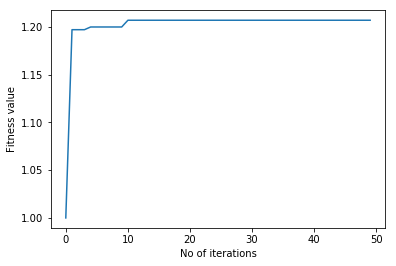

In [34]:
plt.plot(plotse)
plt.xlabel('No of iterations')
plt.ylabel('Fitness value')
plt.show()

In [32]:
mem.to_csv('memory_MCI-CN.csv')